In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=250
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('glass.csv')

In [3]:
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

# EDA

In [4]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
df.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


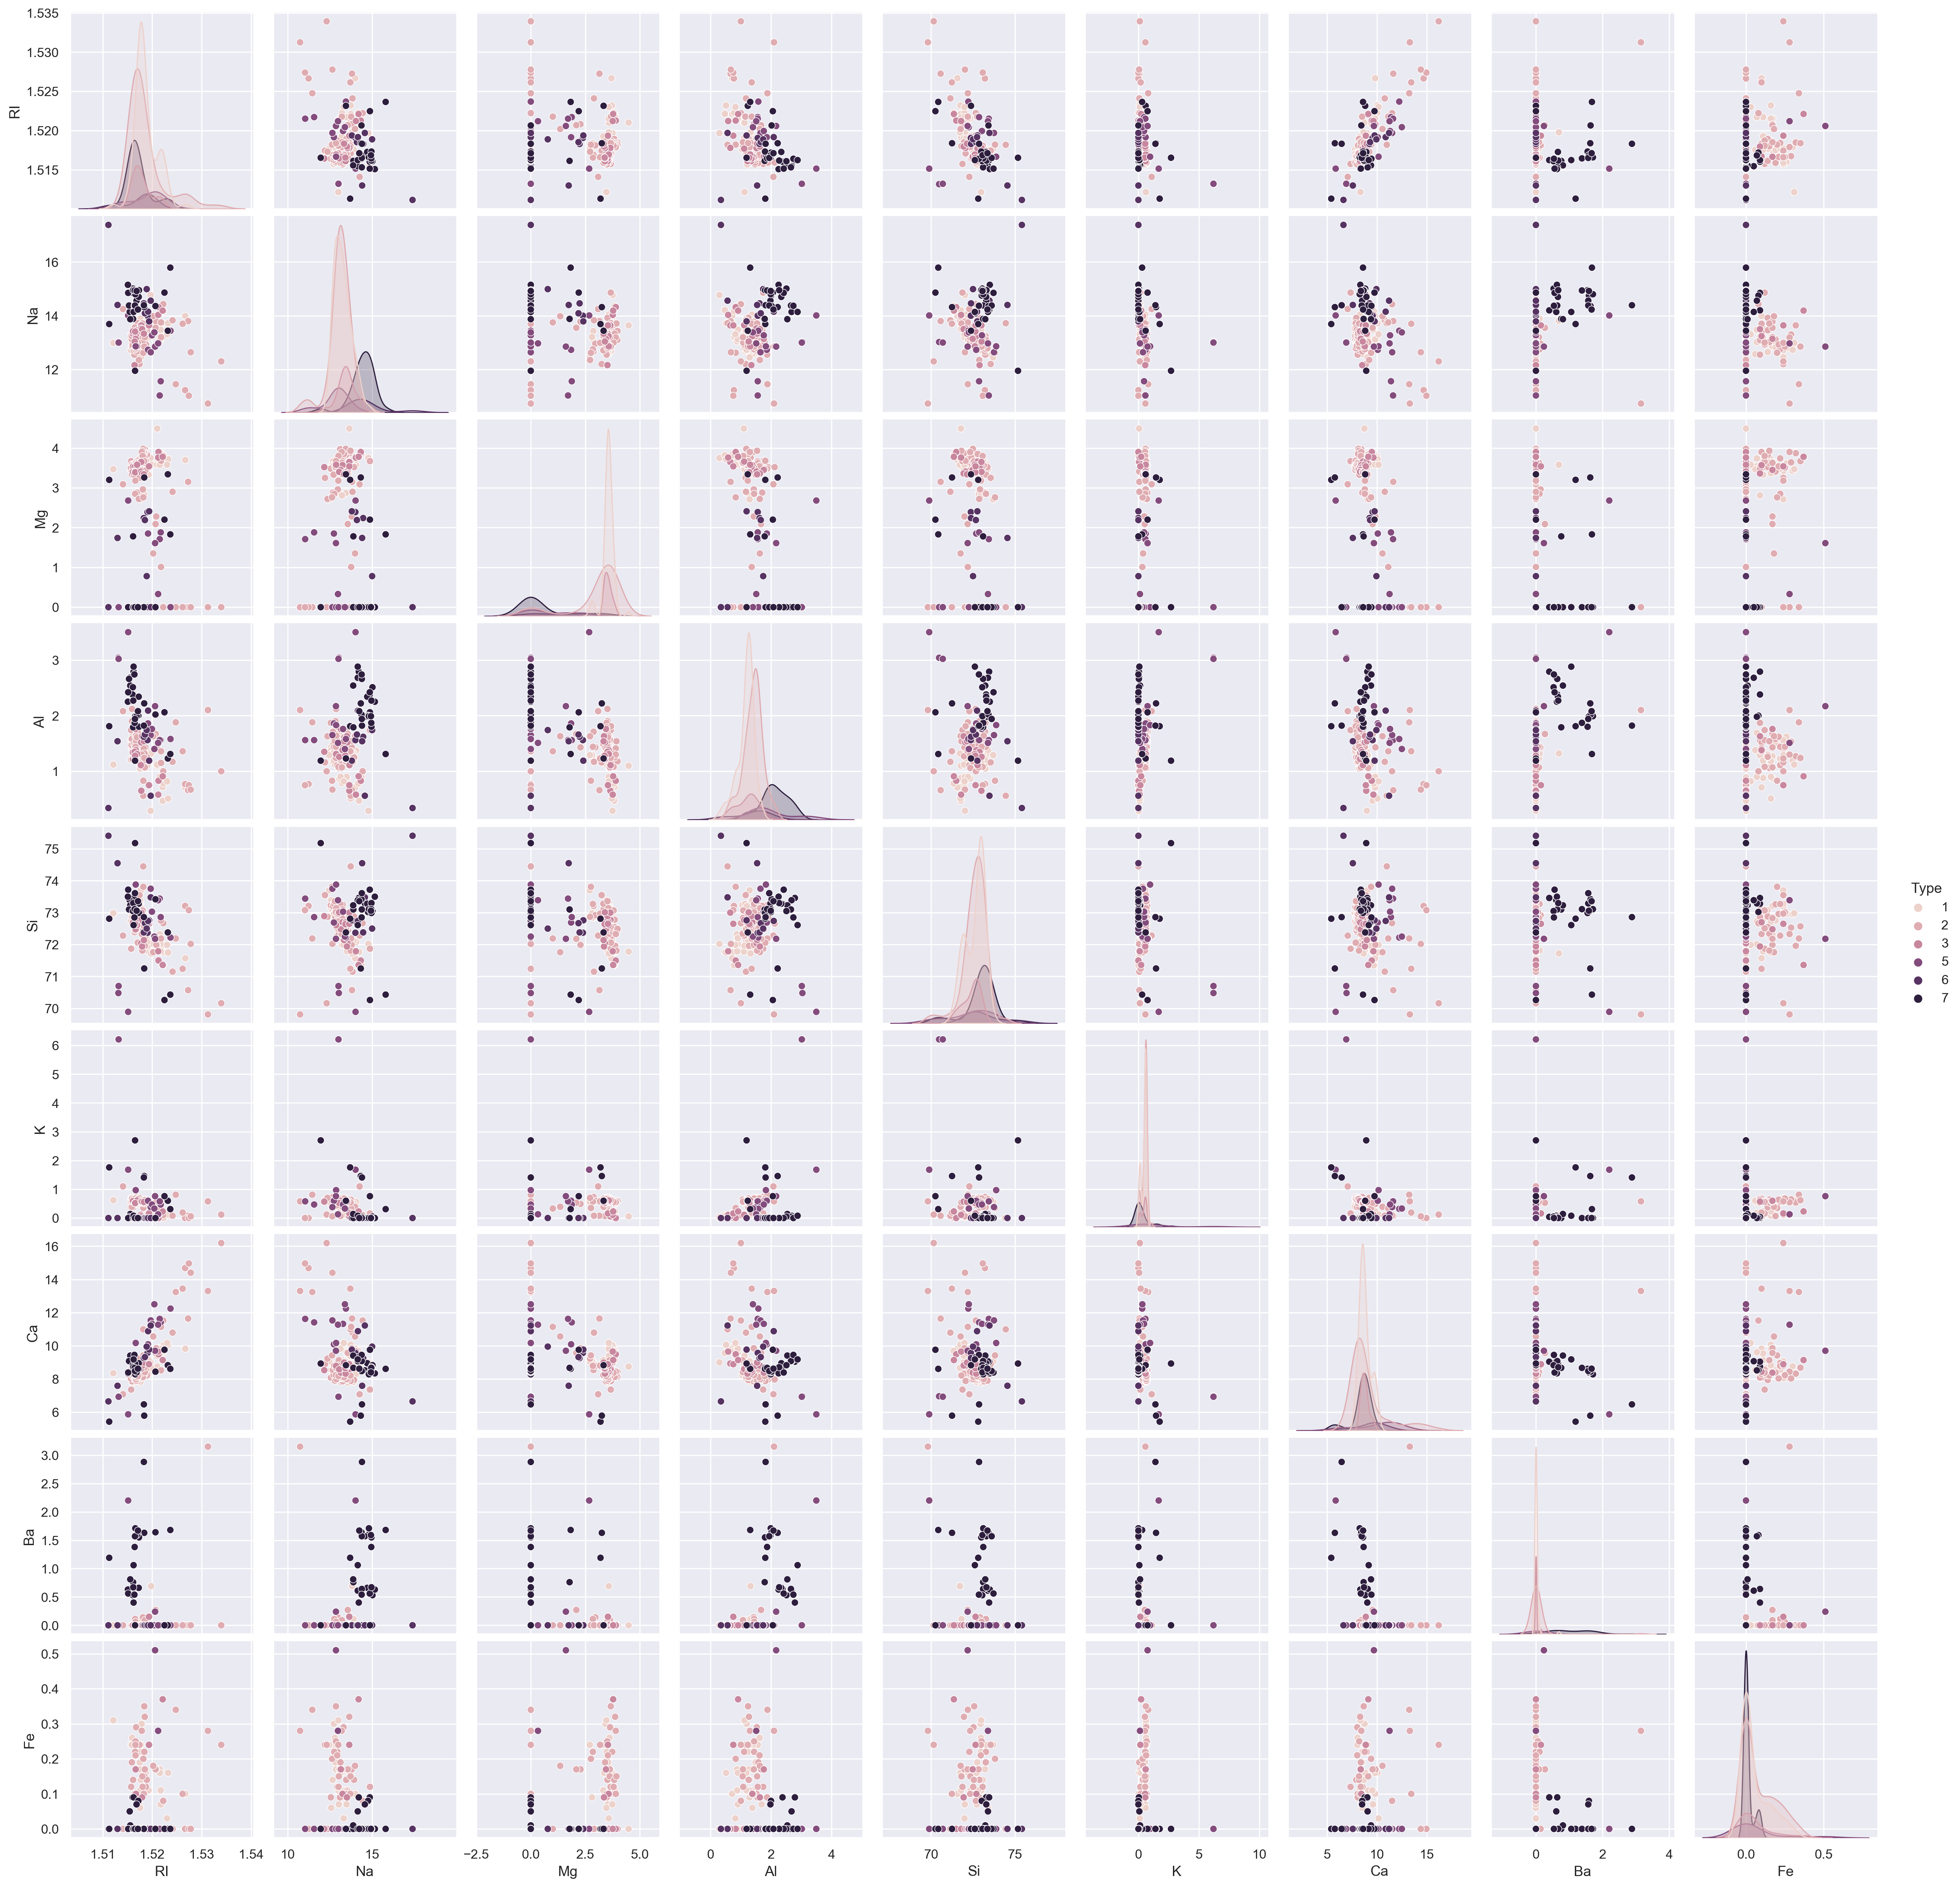

In [14]:
sns.pairplot(df,hue='Type')

# Feature Scalling

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [17]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [18]:
x

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# Train test split

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

# Model Building                   

In [21]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred

array([5, 7, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 7,
       2, 1, 1, 3, 2, 2, 2, 1, 5, 6, 1, 1, 1, 1, 2, 2, 5, 1, 1, 7, 7],
      dtype=int64)

In [22]:
knn.score(xtrain,ytrain) , knn.score(xtest,ytest)

(0.8304093567251462, 0.6744186046511628)

# Hyperparameter Tunning of knn



In [24]:
train_acc=[]
test_acc=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [25]:
train_acc , test_acc

([1.0,
  0.8362573099415205,
  0.8304093567251462,
  0.8070175438596491,
  0.7953216374269005,
  0.7719298245614035,
  0.7192982456140351,
  0.7192982456140351,
  0.7134502923976608,
  0.6783625730994152,
  0.6783625730994152,
  0.6842105263157895,
  0.6900584795321637,
  0.6842105263157895,
  0.6608187134502924,
  0.6608187134502924,
  0.6608187134502924,
  0.6608187134502924,
  0.6491228070175439,
  0.6549707602339181,
  0.631578947368421,
  0.6491228070175439,
  0.6432748538011696,
  0.631578947368421],
 [0.6976744186046512,
  0.6976744186046512,
  0.6744186046511628,
  0.6744186046511628,
  0.6976744186046512,
  0.6744186046511628,
  0.6744186046511628,
  0.6744186046511628,
  0.6744186046511628,
  0.6744186046511628,
  0.6744186046511628,
  0.6744186046511628,
  0.6744186046511628,
  0.6976744186046512,
  0.6976744186046512,
  0.7209302325581395,
  0.7209302325581395,
  0.7209302325581395,
  0.6976744186046512,
  0.6744186046511628,
  0.6976744186046512,
  0.6976744186046512,
  0.

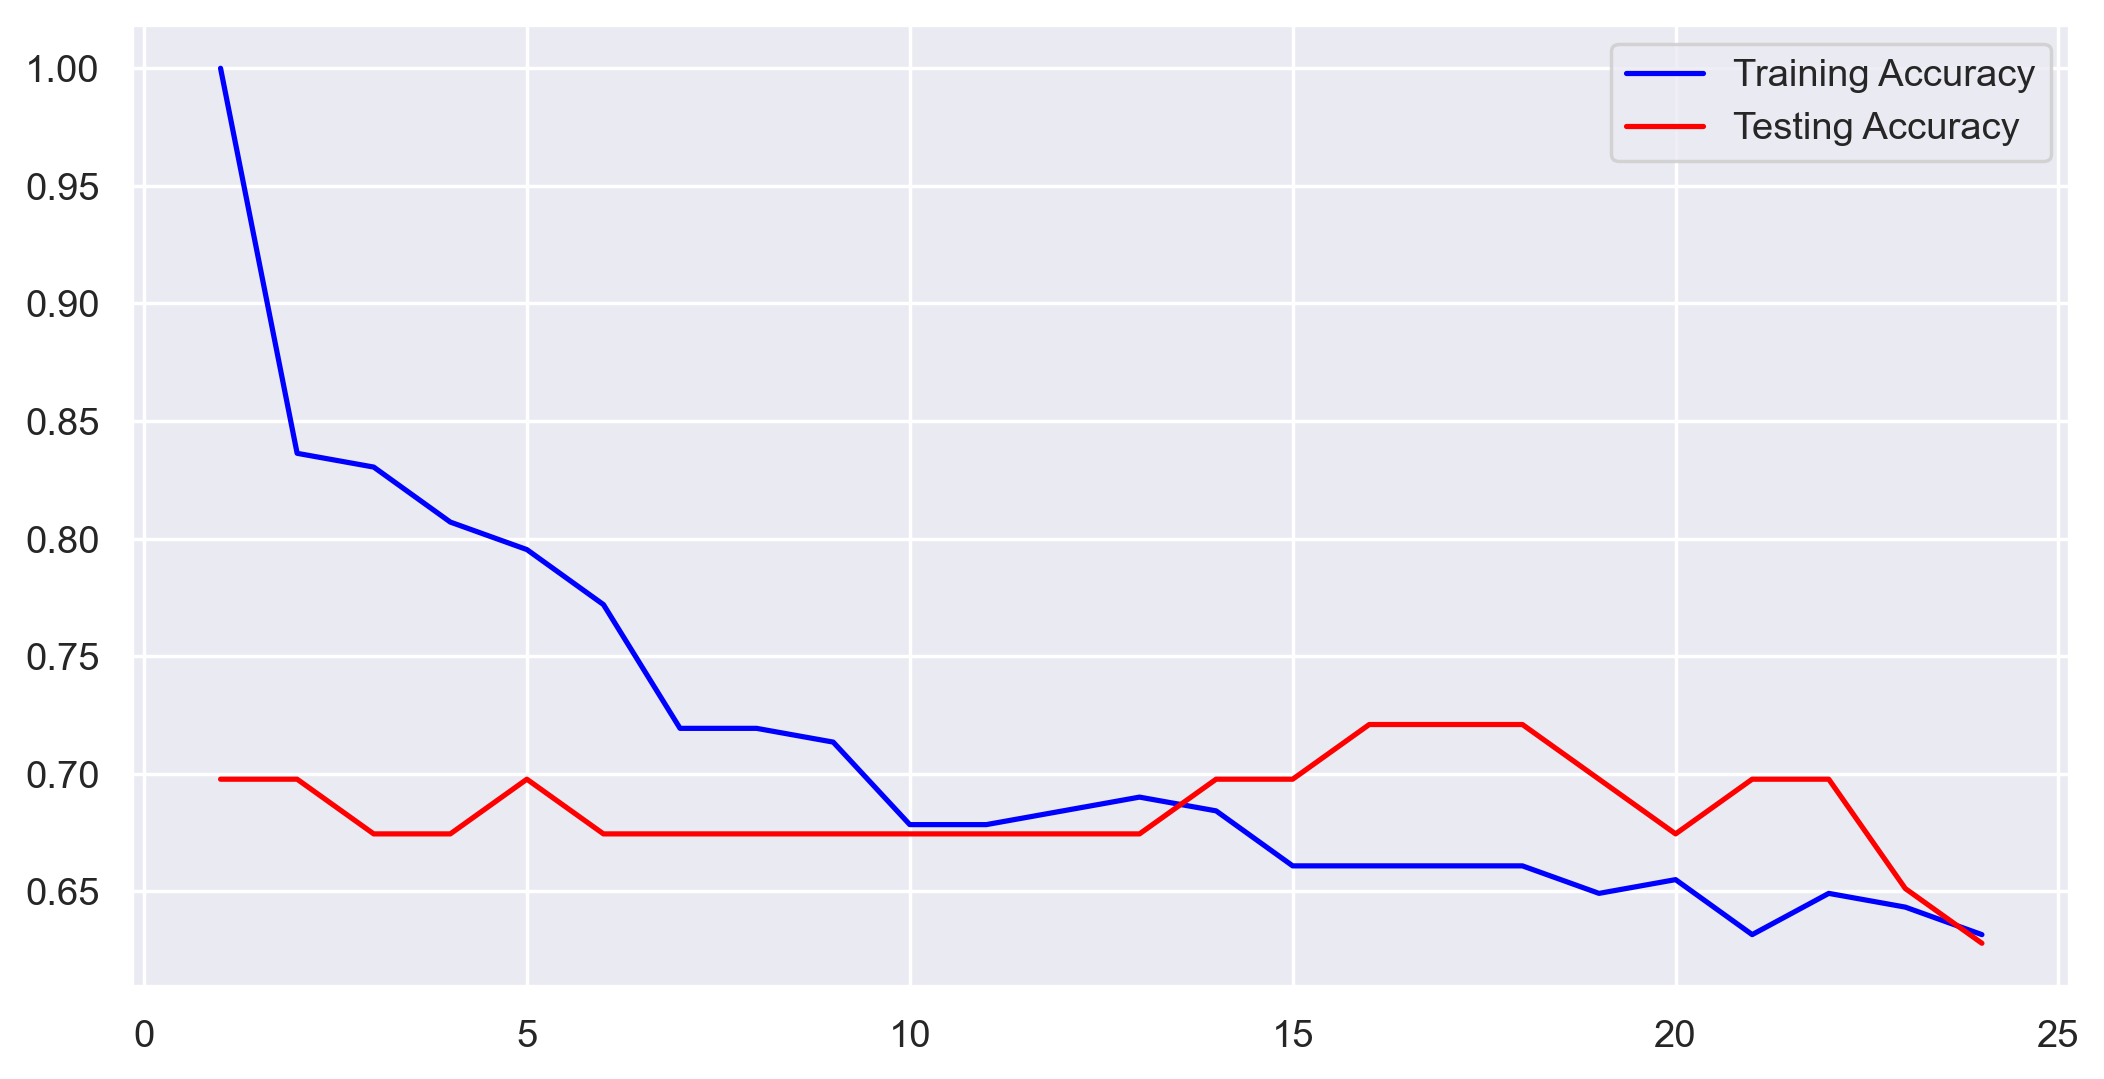

In [26]:
plt.plot(range(1,25),train_acc,linestyle='-',color='blue',label='Training Accuracy')
plt.plot(range(1,25),test_acc,linestyle='-',color='red',label='Testing Accuracy')
plt.legend()

In [27]:
# Select k=14

In [32]:
knn=KNeighborsClassifier(n_neighbors=14)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
ypred

array([6, 7, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 7,
       2, 1, 2, 1, 2, 2, 2, 1, 5, 7, 1, 1, 1, 1, 2, 2, 6, 1, 1, 7, 7],
      dtype=int64)

In [33]:
knn.score(xtrain,ytrain) , knn.score(xtest,ytest)

(0.6842105263157895, 0.6976744186046512)